In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , AveragePooling2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator , load_img , img_to_array
from keras import backend

In [2]:
train_path = "train/"
val_path = "val/"
test_path = "test/"

image_w = 128
image_h = 128
stride = (3,3)
pool = (2,2)
batch_size = 100
if backend.image_data_format() == "channels_first":
    input_shape = (3 , image_w , image_h)
else:
    input_shape = (image_w , image_h , 3)

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(image_w , image_h),
    batch_size=batch_size,
    class_mode="binary"
)
train_generator.class_indices

Found 1600 images belonging to 2 classes.


{'NORMAL': 0, 'PNEUMONIA': 1}

In [5]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(image_w , image_h),
    batch_size=batch_size,
    class_mode="binary"
)
val_generator.class_indices

Found 16 images belonging to 2 classes.


{'NORMAL': 0, 'PNEUMONIA': 1}

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(image_w , image_h),
    batch_size=batch_size,
    class_mode="binary"
)
test_generator.class_indices

Found 350 images belonging to 2 classes.


{'NORMAL': 0, 'PNEUMONIA': 1}

In [8]:
model = Sequential()

model.add( Conv2D(32 , stride , padding="same" , activation="relu" , input_shape=input_shape) )
model.add( MaxPooling2D(pool_size=pool) )

model.add( Conv2D(64 , stride , padding="same" , activation="relu") )
model.add( MaxPooling2D(pool_size=pool) )

model.add( Conv2D(128 , stride , padding="same" , activation="relu") )
model.add( MaxPooling2D(pool_size=pool) )

model.add( Conv2D(128 , stride , padding="same" , activation="relu") )
model.add( MaxPooling2D(pool_size=pool) )

model.add( Flatten() )

model.add( Dropout(.5) )

model.add( Dense(512 , activation="relu") )

model.add( Dense(1 , activation="sigmoid") )

model.compile(optimizer="rmsprop" , loss="binary_crossentropy" , metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       1

In [9]:
history = model.fit_generator(
    train_generator,
    epochs=10,
    validation_data=test_generator,
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
16/16 [==============================] - 56s 4s/step - loss: 0.8972 - accuracy: 0.5650 - val_loss: 0.6689 - val_accuracy: 0.7143
Epoch 2/10
16/16 [==============================] - 53s 3s/step - loss: 0.6671 - accuracy: 0.6250 - val_loss: 0.6012 - val_accuracy: 0.7143
Epoch 3/10
16/16 [==============================] - 57s 4s/step - loss: 0.6818 - accuracy: 0.6075 - val_loss: 0.5936 - val_accuracy: 0.7057
Epoch 4/10
16/16 [==============================] - 56s 4s/step - loss: 0.5816 - accuracy: 0.7000 - val_loss: 0.8662 - val_accuracy: 0.7143
Epoch 5/10
16/16 [==============================] - 49s 3s/step - loss: 0.6706 - accuracy: 0.6856 - val_loss: 0.5473 - val_accuracy: 0.6886
Epoch 6/10
16/16 [==============================] - 55s 3s/step - loss: 0.5518 - accuracy: 0.7262 - val_loss: 0.5269 - val_accuracy: 0.7400
Epoch 7/10
16/16 [==============================] - 59s 4s/step - loss: 0.6230 - acc

In [10]:
loss, acc = model.evaluate_generator(test_generator , verbose=1)
# model.save("unsharp_10epochs.h5")
loss , acc

Instructions for updating:
Please use Model.evaluate, which supports generators.
4/4 [==============================] - 3s 832ms/step - loss: 0.4190 - accuracy: 0.7686


(0.41902029514312744, 0.7685714364051819)

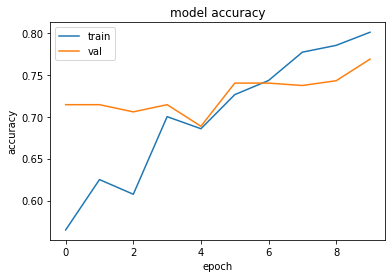

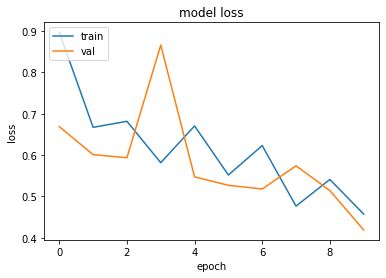

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# nothing : (0.7438372373580933, 0.682692289352417) (4 epochs)

# thresh : (0.4687788188457489, 0.7980769276618958) (4 epochs)
    
# unsharp : 
# (0.42874306440353394, 0.7852563858032227) (4 epochs)
# (0.5442628264427185, 0.807692289352417) (6 epochs)
# (0.47703200578689575, 0.8333333134651184) (8 epochs)
# (0.35110974311828613, 0.8814102411270142) (10 epochs)
# (0.3481963574886322, 0.8381410241127014) (12 epochs)
# (0.3682185709476471, 0.8685897588729858) (14 epochs)